In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
from sklearn.mixture import GaussianMixture

In [2]:
iris_data = load_iris(as_frame=True)
data = iris_data.frame
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [202]:
# let's use RandomForestClassifier to detect feature importance
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feature_importances

petal length (cm)   0.43613
petal width (cm)    0.43606
sepal length (cm)   0.10613
sepal width (cm)    0.02168
dtype: float64

In [203]:
X_train = X[['petal length (cm)', 'petal width (cm)']]

In [204]:
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [205]:
kmeans_clstr = KMeans(n_clusters=3, random_state=42)
kmeans_clstr.fit(X_train)
kmeans_labels = kmeans_clstr.labels_

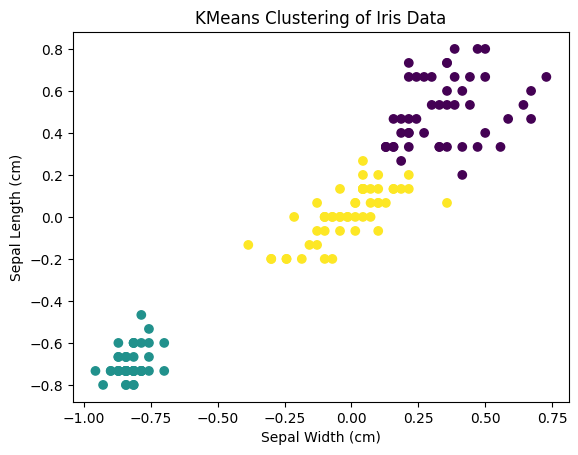

In [206]:
# let's visualize the clusters
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('KMeans Clustering of Iris Data')
plt.show()

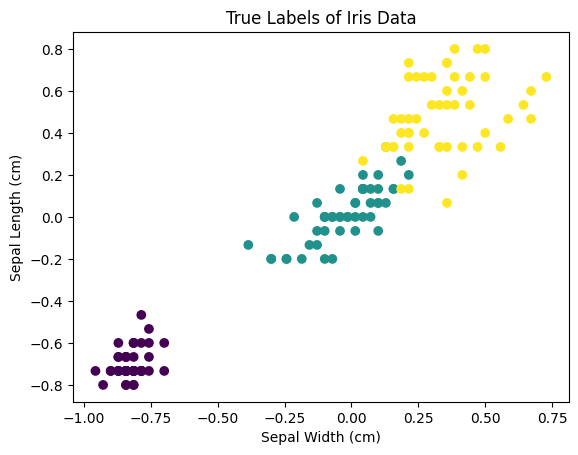

In [207]:
# and compare with the real labels
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('True Labels of Iris Data')
plt.show()

In [208]:
kmeans_clstr.cluster_centers_

array([[ 0.34761905,  0.50416667],
       [-0.82514286, -0.70266667],
       [-0.01538462,  0.01666667]])

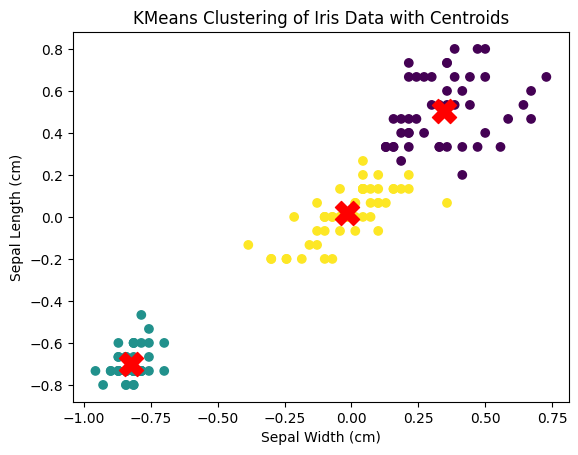

In [209]:
# let's visualize the clusters with centroids
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_clstr.cluster_centers_[:, 0], kmeans_clstr.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('KMeans Clustering of Iris Data with Centroids')
plt.show()

In [210]:
# let's check soft clustering ( distance to centroids)
distances = kmeans_clstr.transform(X_train)

# let's calculate the probabilities of belonging to each cluster
probabilities = np.exp(-distances) / np.sum(np.exp(-distances), axis=1, keepdims=True)
probabilities

array([[0.121985  , 0.65566058, 0.22235442],
       [0.121985  , 0.65566058, 0.22235442],
       [0.12203722, 0.65582469, 0.22213808],
       [0.12329558, 0.65166454, 0.22503988],
       [0.121985  , 0.65566058, 0.22235442],
       [0.14218849, 0.59941728, 0.25839424],
       [0.12629539, 0.64435964, 0.22934497],
       [0.12329558, 0.65166454, 0.22503988],
       [0.121985  , 0.65566058, 0.22235442],
       [0.12452913, 0.64760285, 0.22786802],
       [0.12329558, 0.65166454, 0.22503988],
       [0.12623671, 0.6430728 , 0.23069049],
       [0.12309857, 0.65188168, 0.22501975],
       [0.121932  , 0.65598193, 0.22208608],
       [0.12249425, 0.65486427, 0.22264147],
       [0.13716194, 0.61449306, 0.248345  ],
       [0.13455997, 0.62275912, 0.24268091],
       [0.12629539, 0.64435964, 0.22934497],
       [0.13412733, 0.62117631, 0.24469636],
       [0.1276936 , 0.6400454 , 0.232261  ],
       [0.12978034, 0.6327876 , 0.23743207],
       [0.13716194, 0.61449306, 0.248345  ],
       [0.

In [211]:
# we see 3 columns probabilities for each cluster, but we need to select max 2 probabilities
# let's sort the probabilities
sorted_probabilities = np.sort(probabilities, axis=1)[:, ::-1]
sorted_probabilities

array([[0.65566058, 0.22235442, 0.121985  ],
       [0.65566058, 0.22235442, 0.121985  ],
       [0.65582469, 0.22213808, 0.12203722],
       [0.65166454, 0.22503988, 0.12329558],
       [0.65566058, 0.22235442, 0.121985  ],
       [0.59941728, 0.25839424, 0.14218849],
       [0.64435964, 0.22934497, 0.12629539],
       [0.65166454, 0.22503988, 0.12329558],
       [0.65566058, 0.22235442, 0.121985  ],
       [0.64760285, 0.22786802, 0.12452913],
       [0.65166454, 0.22503988, 0.12329558],
       [0.6430728 , 0.23069049, 0.12623671],
       [0.65188168, 0.22501975, 0.12309857],
       [0.65598193, 0.22208608, 0.121932  ],
       [0.65486427, 0.22264147, 0.12249425],
       [0.61449306, 0.248345  , 0.13716194],
       [0.62275912, 0.24268091, 0.13455997],
       [0.64435964, 0.22934497, 0.12629539],
       [0.62117631, 0.24469636, 0.13412733],
       [0.6400454 , 0.232261  , 0.1276936 ],
       [0.6327876 , 0.23743207, 0.12978034],
       [0.61449306, 0.248345  , 0.13716194],
       [0.

In [230]:
# select max 2 probabilities
top2_probabilities = sorted_probabilities[:, :2]
top2_probabilities

array([[0.65566058, 0.22235442],
       [0.65566058, 0.22235442],
       [0.65582469, 0.22213808],
       [0.65166454, 0.22503988],
       [0.65566058, 0.22235442],
       [0.59941728, 0.25839424],
       [0.64435964, 0.22934497],
       [0.65166454, 0.22503988],
       [0.65566058, 0.22235442],
       [0.64760285, 0.22786802],
       [0.65166454, 0.22503988],
       [0.6430728 , 0.23069049],
       [0.65188168, 0.22501975],
       [0.65598193, 0.22208608],
       [0.65486427, 0.22264147],
       [0.61449306, 0.248345  ],
       [0.62275912, 0.24268091],
       [0.64435964, 0.22934497],
       [0.62117631, 0.24469636],
       [0.6400454 , 0.232261  ],
       [0.6327876 , 0.23743207],
       [0.61449306, 0.248345  ],
       [0.65224235, 0.22408329],
       [0.57460418, 0.27389307],
       [0.61093328, 0.25172923],
       [0.6430728 , 0.23069049],
       [0.60771172, 0.25288203],
       [0.65166454, 0.22503988],
       [0.65566058, 0.22235442],
       [0.6430728 , 0.23069049],
       [0.

In [231]:
# since we remove 1 probability, we need to normalize the remaining 2 probabilities
top2_probabilities = top2_probabilities / np.sum(top2_probabilities, axis=1, keepdims=True)
top2_probabilities

array([[0.74675328, 0.25324672],
       [0.74675328, 0.25324672],
       [0.74698462, 0.25301538],
       [0.74331158, 0.25668842],
       [0.74675328, 0.25324672],
       [0.69877504, 0.30122496],
       [0.73750285, 0.26249715],
       [0.74331158, 0.25668842],
       [0.74675328, 0.25324672],
       [0.73971947, 0.26028053],
       [0.74331158, 0.25668842],
       [0.73598056, 0.26401944],
       [0.7433922 , 0.2566078 ],
       [0.74707417, 0.25292583],
       [0.74627919, 0.25372081],
       [0.71217658, 0.28782342],
       [0.71958668, 0.28041332],
       [0.73750285, 0.26249715],
       [0.71739915, 0.28260085],
       [0.7337392 , 0.2662608 ],
       [0.72715847, 0.27284153],
       [0.71217658, 0.28782342],
       [0.74429221, 0.25570779],
       [0.67720217, 0.32279783],
       [0.70819501, 0.29180499],
       [0.73598056, 0.26401944],
       [0.706154  , 0.293846  ],
       [0.74331158, 0.25668842],
       [0.74675328, 0.25324672],
       [0.73598056, 0.26401944],
       [0.

In [232]:
# Let's add flags border_cluster to all points with max probability < 0.55
border_cluster = np.max(top2_probabilities, axis=1) < 0.55

In [233]:
# let's add border_cluster to X_train
X_train['border_cluster'] = border_cluster
X_train['kmeans_labels'] = kmeans_labels
X_train['true_labels'] = y.values
X_train

,petal length (cm),petal width (cm),border_cluster,kmeans_labels,true_labels
0,-0.84286,-0.73333,False,1,0
1,-0.84286,-0.73333,False,1,0
2,-0.87143,-0.73333,False,1,0
3,-0.81429,-0.73333,False,1,0
4,-0.84286,-0.73333,False,1,0
...,...,...,...,...,...
145,0.24286,0.66667,False,0,2
146,0.18571,0.40000,False,0,2
147,0.24286,0.46667,False,0,2
148,0.30000,0.66667,False,0,2


In [224]:
# count of border_cluster in the dataset
X_train['border_cluster'].value_counts()

border_cluster
False    136
True      14
Name: count, dtype: int64

In [225]:
# percentage of border_cluster in the dataset
X_train['border_cluster'].value_counts() / len(X_train)

border_cluster
False   0.90667
True    0.09333
Name: count, dtype: float64

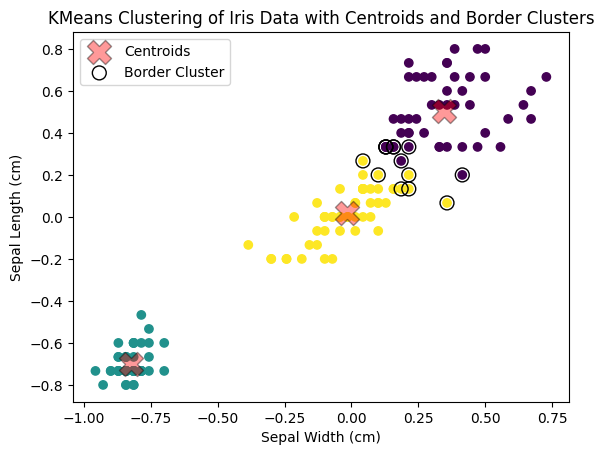

In [226]:
# let's visualize the clusters with centroids and border_cluster
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_clstr.cluster_centers_[:, 0], kmeans_clstr.cluster_centers_[:, 1], s=300, c='red', marker='X', edgecolors='black', label='Centroids', alpha=0.4)
plt.scatter(X_train[border_cluster].iloc[:, 0], X_train[border_cluster].iloc[:, 1], s=100, facecolors='none', edgecolors='black', label='Border Cluster')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('KMeans Clustering of Iris Data with Centroids and Border Clusters')
plt.legend()
plt.show()

In [4]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

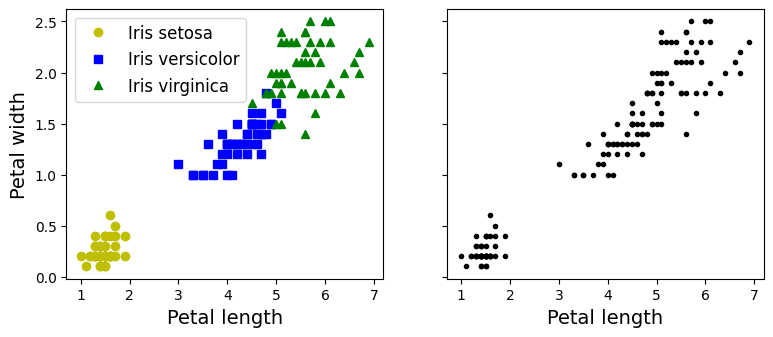

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [8]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit_predict(X)

Let's map each cluster to a class.

Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the scipy.stats.mode() function):

In [10]:
import numpy as np
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id], keepdims=True)
    mapping[mode.item()] = class_id

mapping

{1: np.int64(0), 2: np.int64(1), 0: np.int64(2)}

In [11]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

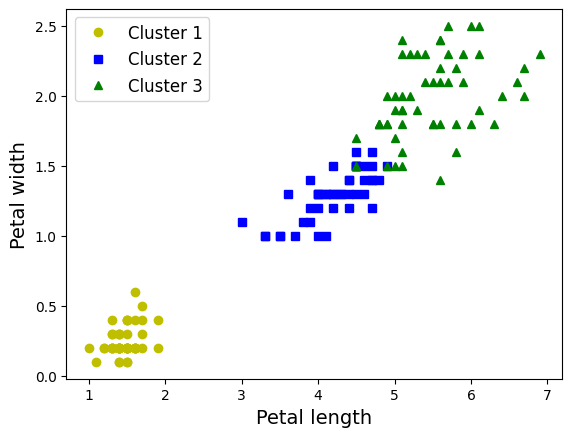

In [12]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [13]:
np.sum(y_pred==y)

np.int64(145)

In [14]:
np.sum(y_pred==y) / len(y_pred)

np.float64(0.9666666666666667)

Note: the results in this notebook may differ slightly from the book. This is because algorithms can sometimes be tweaked a bit between Scikit-Learn versions.